#Learning to implement Neural Network

Gurmukhi Handwritten Digit Classification: Gurmukhi is one of the popular
Indian scripts widely used in Indian state of Punjab. In this part of the assignment,
our goal is to develop a neural network solution (a simple NN, not a CNN) for classifying
Gurmukhi digits. We provide you Handwritten Gurmukhi digit dataset here:

In [7]:
##Importing required Packages
import os
import cv2
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img
from keras import regularizers, optimizers
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define the paths to your image folders
train_path = '/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train'
val_path = '/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val'

In [3]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path
print(data_dir)
# Set the taget image size
img_size = (28, 28)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
  folder_path = os.path.join(data_dir, str(label))
  print(folder_path)
  # Loop over each image in the folder
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(('.tiff','.bmp')):
    # Load the image and resize it to the desired size
      img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, img_size)
      # Append the image and label to the lists
      images.append(img)
      labels.append(label)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/0
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/1
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/2
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/3
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/4
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/5
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/6
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/7
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/8
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/train/9


In [4]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
print(data_dir_val)
# Set the image size
img_size_val = (28, 28)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
  folder_path = os.path.join(data_dir_val, str(label))
  print(folder_path)
  for file in os.listdir(folder_path):
    # Loop over each image in the folder
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(('.tiff','.bmp')):
    # Load the image and resize it to the desired size
      img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, img_size_val)
      # Append the image and label to the lists
      images_val.append(img)
      labels_val.append(label)
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/0
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/1
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/2
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/3
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/4
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/5
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/6
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/7
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/8
/content/drive/MyDrive/DataScienceProjects/GurNum_NN/GurNum/val/9


In [5]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [24]:
x_test

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 222, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 222, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 235, 255, 255],
        [255, 255, 255, ..., 105, 235, 255],
        ...,
        [255, 255, 222, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [25]:
print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of validation examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 1000 and each image is of shape (28, 28)
Number of validation examples : 178 and each image is of shape (28, 28)


In [26]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) 

In [27]:
# after converting the input images from 3d to 2d vectors
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of validation examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 1000 and each image is of shape (784)
Number of validation examples : 178 and each image is of shape (784)


In [28]:
# An example data point
print(X_train[0])

[255 255 255 255 255 255 255 255 251 152   0   0 186 254 237 237 237 237
 248 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 200
 157   0   0   0   0 186   0   0   0   0 129 200 200 255 255 255 255 255
 255 255 255 255 255 255 255 255 170   0   0   0   0   0   0   0   0   0
   0   0   0   0   0 170 255 255 255 255 255 255 255 255 255 255 255 155
   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   9 155 255
 255 255 255 255 255 255 255 255 150  20   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  20 150 255 255 255 255 255 255 255 155
  20   0   0   0   0   0   0   0   0   0   0  43 200 200 200  43   0   0
   0  20 155 255 255 255 255 255 170   9   0   0   0   0  51 237 237 237
 237 237 237 241 255 255 255 241 237   0   0   0   9 170 255 255 255 251
 152   0   0   0   0  35 255 255 255 255 255 255 255 255 255 255 255 255
 255 238  14   0   0 152 251 255 255 200   0   0   0   0  51 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 20

In [29]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [30]:
# example data point after normlizing
print(X_train[0])

[1.         1.         1.         1.         1.         1.
 1.         1.         0.98431373 0.59607843 0.         0.
 0.72941176 0.99607843 0.92941176 0.92941176 0.92941176 0.92941176
 0.97254902 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.78431373
 0.61568627 0.         0.         0.         0.         0.72941176
 0.         0.         0.         0.         0.50588235 0.78431373
 0.78431373 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.66666667 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.66666667
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.60784314
 0.03529412 0.         0.         0.         0.         0.
 0.     

In [31]:
# here we are having a class number for each image
print("Class label of first image :", y_train[699])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train, 10) 
Y_test = utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[699])

Class label of first image : 6
After converting the output into a vector :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [32]:
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

##Softmax classifier

In [33]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation 

In [34]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [35]:
#start building a model
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [36]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, Y_train, steps_per_epoch=500, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0165 - accuracy: 1.0000 - val_loss: 0.1815 - val_accuracy: 0.9551
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1754 - val_accuracy: 0.9551
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.1842 - val_accuracy: 0.9551
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.1698 - val_accuracy: 0.9551
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.1772 - val_accuracy: 0.9607
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9551
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.1852 - val_accuracy: 0.9551
Epoch 

In [39]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.18044139444828033
Test accuracy: 0.9550561904907227


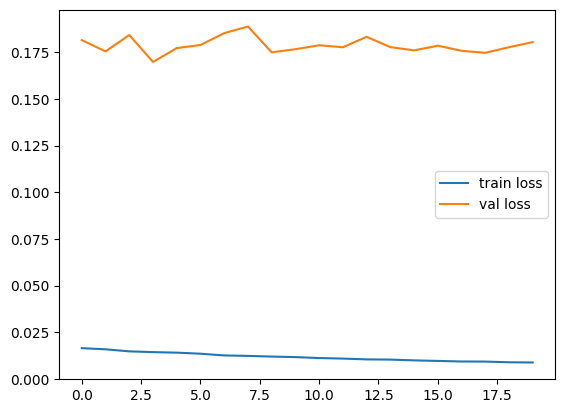

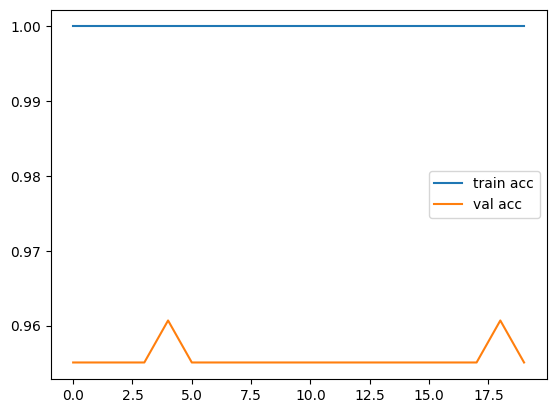

In [40]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##MLP + Sigmoid activation + SGDOptimizer

In [41]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
8/8 [==============================] - 1s 39ms/step - loss: 2.5036 - accuracy: 0.1000 - val_loss: 2.4163 - val_accuracy: 0.0955
Epoch 2/20
8/8 [==============================] - 0s 15ms/step - loss: 2.3841 - accuracy: 0.1000 - val_loss: 2.3476 - val_accuracy: 0.0955
Epoch 3/20
8/8 [==============================] - 0s 16ms/step - loss: 2.3344 - accuracy: 0.1000 - val_loss: 2.3159 - val_accuracy: 0.0955
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 2.3100 - accuracy: 0.1050 - val_loss: 2.2993 - val_accuracy: 0.1404
Epoch 5/20
8/8 [==============================] - 0s 14ms/step - loss: 2.2965 - accuracy: 0.1710 - val_loss: 2.2901 - val_accuracy: 0.1798
Epoch 6/20
8/8 [==============================] - 0s 16ms/step - loss: 2.2886 - accuracy: 0.1590 - val_loss: 2.2836 - val_accuracy: 0.2022
Epoch 7/20
8/8 [==============================] - 0s 15ms/step - loss: 2.2813 - accuracy: 0.2240 - val_loss: 2.2789 - val_accuracy: 0.2135
Epoch 8/20
8/8 [===========

In [43]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 2.2337119579315186
Test accuracy: 0.550561785697937


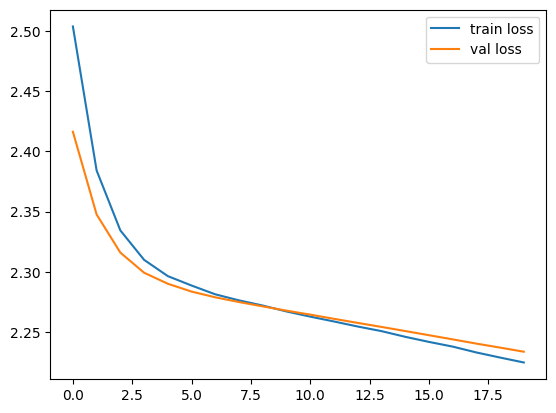

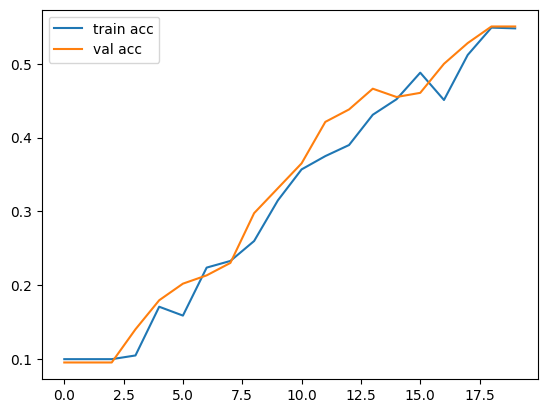

In [44]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##MLP + Sigmoid activation + ADAM

In [45]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
8/8 [==============================] - 2s 41ms/step - loss: 2.1690 - accuracy: 0.3220 - val_loss: 1.9412 - val_accuracy: 0.4775
Epoch 2/20
8/8 [==============================] - 0s 18ms/step - loss: 1.6515 - accuracy: 0.7300 - val_loss: 1.4987 - val_accuracy: 0.8034
Epoch 3/20
8/8 [==================

In [46]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.22430908679962158
Test accuracy: 0.9438202381134033


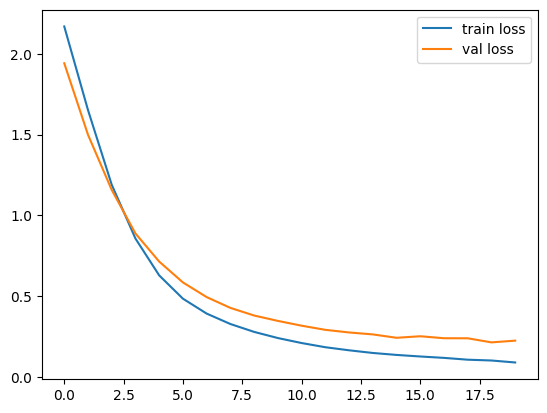

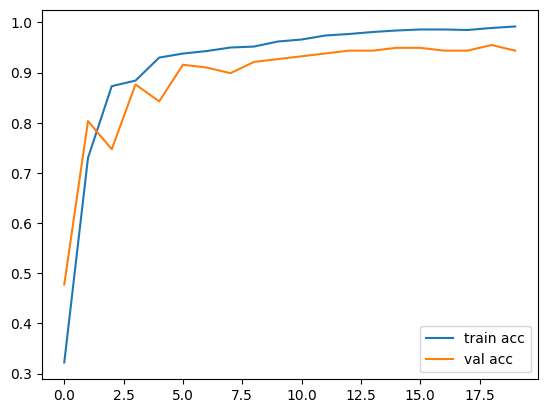

In [47]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##MLP + ReLU +SGD

In [48]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
8/8 [==============================] - 1s 58ms/step - loss: 2.3225 - accuracy: 0.3020 - val_loss: 1.5672 - val_accuracy: 0.4775
Epoch 2/20
8/8 [==============================] - 0s 22ms/step - loss: 1.0520 - accuracy: 0.7060 - val_loss: 1.1080 - val_accuracy: 0.6742
Epoch 3/20
8/8 [==============================] - 0s 22ms/step - loss: 0.7151 - accuracy: 0.8260 - val_loss: 0.9007 - val_accuracy: 0.7079
Epoch 4/20
8/8 [==============================] - 0s 26ms/step - loss: 0.5502 - accuracy: 0.8610 - val_loss: 0.7593 - val_accuracy: 0.7809
Epoch 5/20
8/8 [==============================] - 0s 24ms/step - loss: 0.4483 - accuracy: 0.8880 - val_loss: 0.6751 - val_accuracy: 0.8090
Epoch 6/20
8/8 [==============================] - 0s 22ms/step - loss: 0.3803 - accuracy: 0.9160 - val_loss: 0.6096 - val_accuracy: 0.8371
Epoch 7/20
8/8 [==============================] - 0s 26ms/step - loss: 0.3323 - accuracy: 0.9270 - val_loss: 0.5522 - val_accuracy: 0.8315
Epoch 8/20
8/8 [===========

In [50]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.33662959933280945
Test accuracy: 0.915730357170105


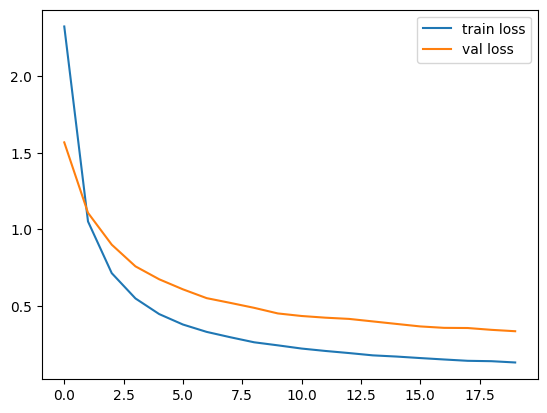

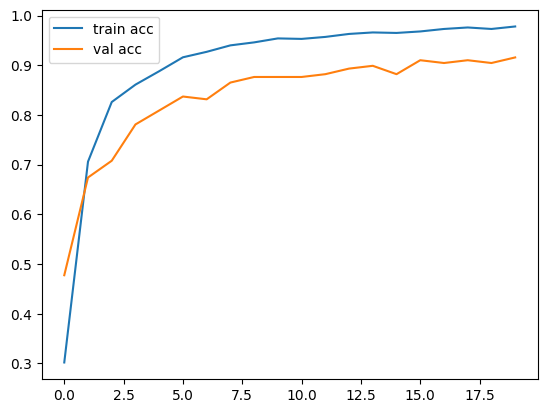

In [51]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##MLP + ReLU + ADAM

In [52]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dense_12 (Dense)            (None, 128)               65664     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
8/8 [==============================] - 1s 41ms/step - loss: 2.1525 - accuracy: 0.4370 - val_loss: 1.3038 - val_accuracy: 0.6404
Epoch 2/20
8/8 [==============================] - 0s 18ms/step - loss: 0.5683 - accuracy: 0.8210 - val_loss: 0.6006 - val_accuracy: 0.7865
Epoch 3/20
8/8 [=============

In [53]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.16083161532878876
Test accuracy: 0.949438214302063


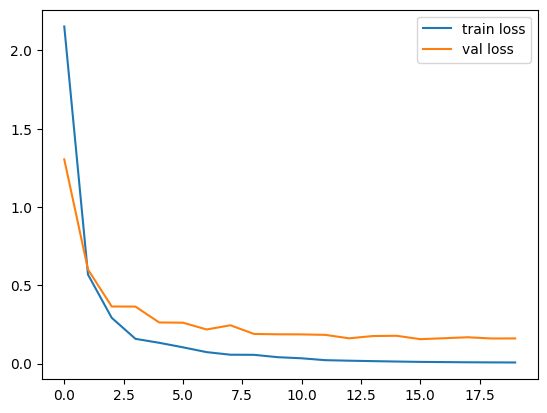

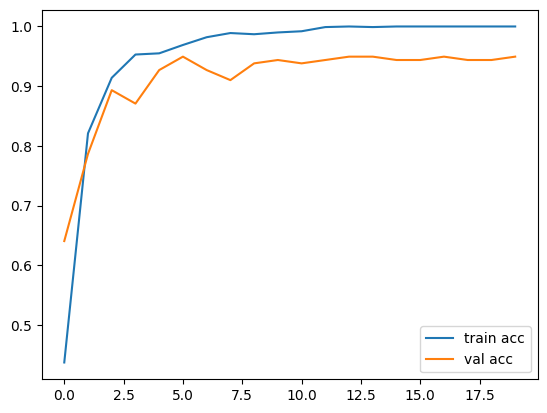

In [55]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [54]:
!pip install keras-layer-normalization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-layer-normalization: filename=keras_layer_normalization-0.16.0-py3-none-any.whl size=4666 sha256=91e75931f0ac2a1c5db9d51c3538adf391a690d25e35e8097d3a068714d9d499
  Stored in directory: /root/.cache/pip/wheels/ed/3a/4b/21db23c0cc56c4b219616e181f258eb7c57d36cc5d056fae9a
Successfully built keras-layer-normalization


In [56]:
# import BatchNormalization
from keras.layers import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_15 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                                 
Total params: 471,434
Trainable params: 470,154
Non-tr

In [57]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
8/8 [==============================] - 2s 51ms/step - loss: 0.9662 - accuracy: 0.7120 - val_loss: 2.3494 - val_accuracy: 0.2191
Epoch 2/20
8/8 [==============================] - 0s 20ms/step - loss: 0.1206 - accuracy: 0.9670 - val_loss: 2.2177 - val_accuracy: 0.2303
Epoch 3/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0587 - accuracy: 0.9920 - val_loss: 2.1848 - val_accuracy: 0.2528
Epoch 4/20
8/8 [==============================] - 0s 18ms/step - loss: 0.0389 - accuracy: 0.9940 - val_loss: 2.1629 - val_accuracy: 0.2640
Epoch 5/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0262 - accuracy: 0.9980 - val_loss: 2.1185 - val_accuracy: 0.2809
Epoch 6/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0190 - accuracy: 0.9990 - val_loss: 2.0561 - val_accuracy: 0.3034
Epoch 7/20
8/8 [==============================] - 0s 20ms/step - loss: 0.0151 - accuracy: 0.9990 - val_loss: 1.9646 - val_accuracy: 0.3371
Epoch 8/20
8/8 [===========

In [58]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.6455740928649902
Test accuracy: 0.8033707737922668


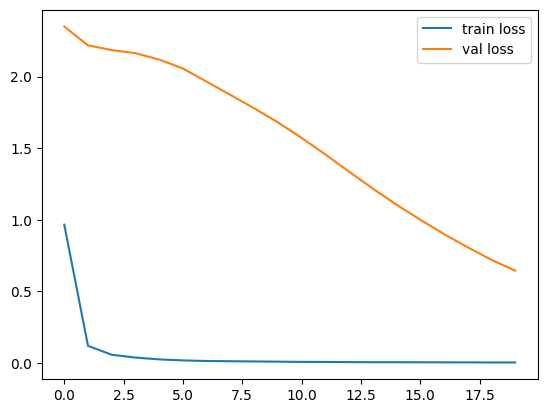

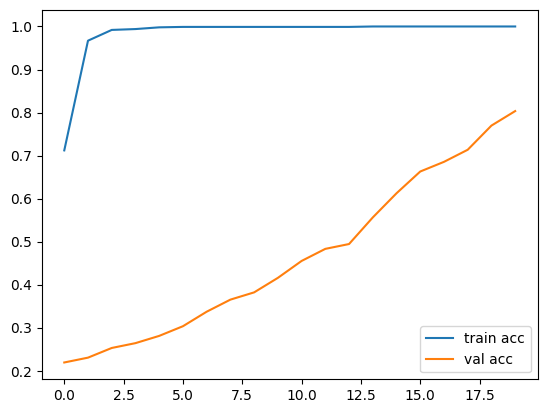

In [59]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##MLP + Dropout + AdamOptimizer + Sigmoid

In [60]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [61]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
8/8 [==============================] - 2s 50ms/step - loss: 2.1386 - accuracy: 0.3820 - val_loss: 2.4483 - val_accuracy: 0.1798
Epoch 2/20
8/8 [==============================] - 0s 21ms/step - loss: 0.7236 - accuracy: 0.7760 - val_loss: 2.1678 - val_accuracy: 0.1798
Epoch 3/20
8/8 [==============================] - 0s 22ms/step - loss: 0.5013 - accuracy: 0.8400 - val_loss: 1.9902 - val_accuracy: 0.2360
Epoch 4/20
8/8 [==============================] - 0s 20ms/step - loss: 0.3636 - accuracy: 0.8780 - val_loss: 1.8623 - val_accuracy: 0.2753
Epoch 5/20
8/8 [==============================] - 0s 21ms/step - loss: 0.3324 - accuracy: 0.8930 - val_loss: 1.7217 - val_accuracy: 0.3539
Epoch 6/20
8/8 [==============================] - 0s 21ms/step - loss: 0.2409 - accuracy: 0.9250 - val_loss: 1.6076 - val_accuracy: 0.3764
Epoch 7/20
8/8 [==============================] - 0s 21ms/step - loss: 0.2222 - accuracy: 0.9280 - val_loss: 1.5420 - val_accuracy: 0.4045
Epoch 8/20
8/8 [===========

In [62]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


Test score: 0.4804587662220001
Test accuracy: 0.8314606547355652


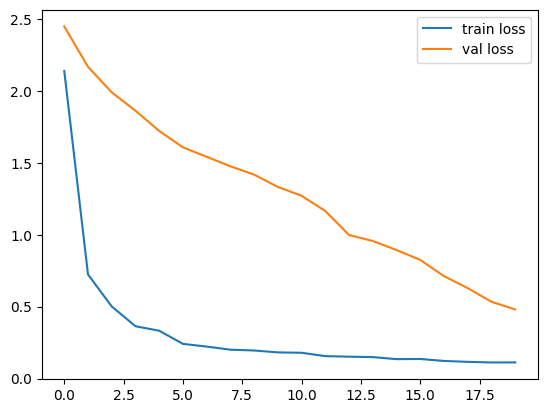

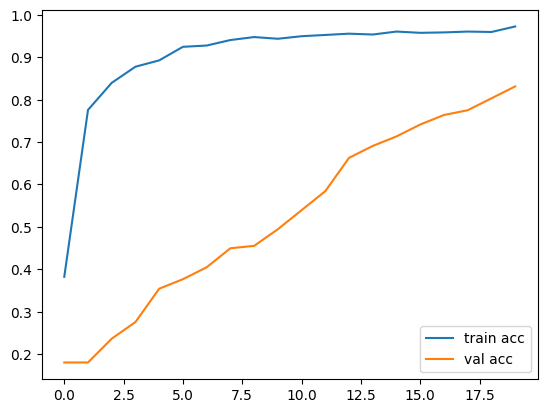

In [63]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

##MLP + Dropout + AdamOptimizer + ReLU

In [64]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from tensorflow.keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [65]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
8/8 [==============================] - 2s 71ms/step - loss: 1.9796 - accuracy: 0.4290 - val_loss: 2.8345 - val_accuracy: 0.4326
Epoch 2/20
8/8 [==============================] - 0s 35ms/step - loss: 0.6209 - accuracy: 0.8140 - val_loss: 2.0737 - val_accuracy: 0.5281
Epoch 3/20
8/8 [==============================] - 0s 30ms/step - loss: 0.4224 - accuracy: 0.8740 - val_loss: 2.0006 - val_accuracy: 0.5337
Epoch 4/20
8/8 [==============================] - 0s 33ms/step - loss: 0.3164 - accuracy: 0.9030 - val_loss: 1.9011 - val_accuracy: 0.5730
Epoch 5/20
8/8 [==============================] - 0s 38ms/step - loss: 0.2422 - accuracy: 0.9330 - val_loss: 1.7657 - val_accuracy: 0.5955
Epoch 6/20
8/8 [==============================] - 0s 41ms/step - loss: 0.2285 - accuracy: 0.9260 - val_loss: 1.6479 - val_accuracy: 0.6124
Epoch 7/20
8/8 [==============================] - 0s 37ms/step - loss: 0.1885 - accuracy: 0.9500 - val_loss: 1.5445 - val_accuracy: 0.6067
Epoch 8/20
8/8 [===========

In [66]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.5007688403129578
Test accuracy: 0.8426966071128845


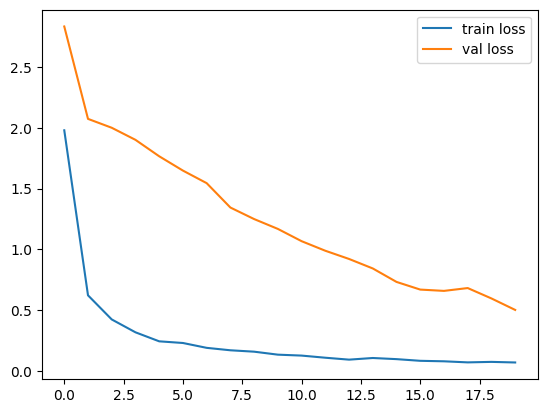

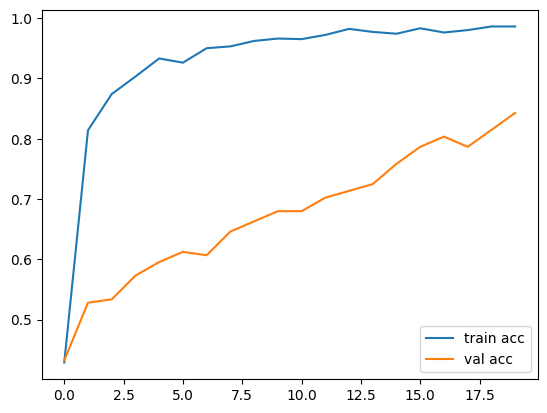

In [67]:
%matplotlib inline
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')